# Homework 4 - Getting to know your customers

Over time, the Banking sector has dabbled into plenty of Data Science applications. The latter includes topics such as Fraud detection, risk modelling for investment, personalized marketing, managing customer data and customer segmentation, among others. The latter is a crucial topic for a bank since they can offer their products more accurately and tailor-made depending on their clients' characteristics and how probable they will consume more services from the bank.

Now, you and your team have been hired by a bank to get to know their customers. In other words, you will implement hashing and clustering techniques to extract relevant information and highlights from those clients and their transactions.

Then, let's get started!

In [1]:
import pandas as pd
from datetime import datetime
from random import randint
from tqdm import tqdm
import numpy as np
from numpy.linalg import norm
from operator import itemgetter
import matplotlib.pyplot as plt
import pickle as pkl
from scipy import stats
from sklearn import preprocessing
import math
import six
from sklearn.decomposition import PCA
from itertools import chain
from collections import Counter

In [ ]:
data = pd.read_csv("bank_transactions.csv")   # importing the dataset

In [ ]:
data                                        # visualize the data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


In [ ]:
data.info()                                                 # showing some info on the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041614 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 79.5+ MB


In [ ]:
data.isna().sum()                                     # counts of rows with na

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

In [ ]:
data.dropna(inplace=True)                                # removing na

In [ ]:
data.isna().sum()                                        # check

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
data.CustomerDOB =  pd.to_datetime(data.CustomerDOB)

In [ ]:
data.TransactionDate  = pd.to_datetime(data.TransactionDate)

In [ ]:
pd.to_datetime(data.TransactionTime)

0         1970-01-01 00:00:00.000143207
1         1970-01-01 00:00:00.000141858
2         1970-01-01 00:00:00.000142712
3         1970-01-01 00:00:00.000142714
4         1970-01-01 00:00:00.000181156
                       ...             
1048562   1970-01-01 00:00:00.000184824
1048563   1970-01-01 00:00:00.000183734
1048564   1970-01-01 00:00:00.000183313
1048565   1970-01-01 00:00:00.000184706
1048566   1970-01-01 00:00:00.000181222
Name: TransactionTime, Length: 1041614, dtype: datetime64[ns]

In [ ]:
data.TransactionTime 

0          143207
1          141858
2          142712
3          142714
4          181156
            ...  
1048562    184824
1048563    183734
1048564    183313
1048565    184706
1048566    181222
Name: TransactionTime, Length: 1041614, dtype: int64

In [ ]:
def convert_time(value):
    sec = str(value % 100)
    minutes = str((value //100) %100)
    hours = str((value // 10000) %100)
    return datetime.strptime(str(hours)+":"+str(minutes)+":"+str(sec), '%H:%M:%S').time()

In [ ]:
data.TransactionTime = data.TransactionTime.apply(lambda row: convert_time(row))

<AxesSubplot:>

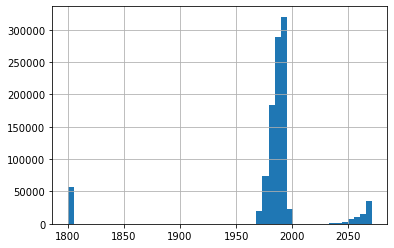

In [ ]:
data.CustomerDOB.dt.year.hist(bins=50)

In [ ]:
data.loc[data.CustomerDOB.dt.year > 2000,'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000,'CustomerDOB']  - pd.DateOffset(years=100)

In [ ]:
data.drop(data.loc[data.CustomerDOB.dt.year==1800].index,axis=0,inplace=True)

<AxesSubplot:>

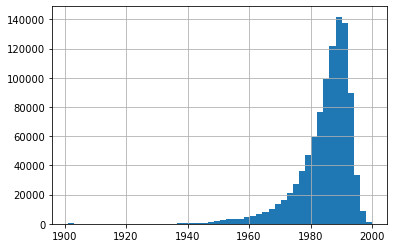

In [ ]:
data.CustomerDOB.dt.year.hist(bins=50)

In [ ]:
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)

In [ ]:
data.TransactionDate = pd.to_datetime(data.TransactionDate)

In [ ]:
data.CustGender = [str(x) for x in data.CustGender]

In [ ]:
data.CustLocation = [str(x) for x in data.CustLocation]

In [ ]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
data.to_pickle("processed.pkl")

## 1. Finding Similar Costumers

Companies nowadays are implementing product suggestions to provide users with things they are likely to buy. 

The process often starts by finding similar behaviours among consumers; for this task, we will focus on this part in the specific.

Here you will implement an algorithm to find the most similar match to a consumer given his bank account information. 

In particular, you will implement your version of the LSH algorithm that takes as input information about a consumer and finds people similar to the one in the study.

### 1.1 Set up the data

In [ ]:
data = pd.read_pickle('processed2.pkl')

In [ ]:
data.isna().sum()

CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
data.drop(['CustomerID','TransactionID'], axis = 1,inplace=True)

In [ ]:
data.index = [x for x in range(len(newdata))]

In [ ]:
data.info

<bound method DataFrame.info of        CustomerDOB CustGender   CustLocation  CustAccountBalance  \
0       1994-10-01          F     JAMSHEDPUR            17819.05   
1       1957-04-04          M        JHAJJAR             2270.69   
2       1996-11-26          F         MUMBAI            17874.44   
3       1973-09-14          F         MUMBAI           866503.21   
4       1988-03-24          F    NAVI MUMBAI             6714.43   
...            ...        ...            ...                 ...   
985317  1990-08-04          M      NEW DELHI             7635.19   
985318  1992-02-20          M         NASHIK            27311.42   
985319  1989-05-18          M      HYDERABAD           221757.06   
985320  1978-08-30          M  VISAKHAPATNAM            10117.87   
985321  1984-05-03          M           PUNE            75734.42   

       TransactionDate TransactionTime  TransactionAmount (INR)  
0           2016-02-08        14:32:07                     25.0  
1           2016-02

In [ ]:
data.to_pickle('newdata.pkl')

## 1.2 Fingerprint Hashing

In [ ]:
transactions = pd.read_pickle('new_data.pkl') #bank_transactions.csv dataset already processed, 'TransactionID' and 'CustomerID' columns are dropped

In [ ]:
transactions.head()

,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5


#### Hash function implemented for creating an hash value for each value in the dataframe

In [ ]:
# Hash function for datetime type
def hash_date(value):
    return int(pd.Timestamp(value).timestamp())

In [ ]:
#Hash function for string type
def hash_string(value,p):
    m =2^32 -1
    a =101
    b=456
    first  = sum([ ord(x)*(p^i) for i,x in enumerate(value)])%m
    return (a* first + b)%p

In [ ]:
#Hash function for float type
def hash_float(value):
    return int(value)

In [ ]:
#Collective Hash function, checks on the type of value parameter and applies the right hash function
def my_hash (value,p):
    if not isinstance(value,int):
            if isinstance(value,datetime): 
                value  = hash_date(value)
            elif isinstance(value,str): 
                value = hash_string(value,p)
            elif isinstance(value,float): 
                value = hash_float(value)
    return value

#### Initialization of the parameter for the MinHash algorithm

In [ ]:
p  = 125539 #prime number
N  = 100  #number of permutations
max_val = 2^32-1 #value used for the randomization in the creation of the permutations
permutations = [(randint(0,max_val), randint(0,max_val)) for _ in range(N)] #  N permutations of two integers a,b

#### MinHash function: creates a minHash signature for the transaction given as input.

The minHash function to create a minhash signature for each transaction has this parameters:
1. N hash functions that have this structure : f(value,a,b,p): return (a*value+b)%p, the N coefficients a and b are obtained by permutating two integers N times
2. p which is a prime number

The signature is represented as an array of length N, the i-th element is the minimum hash value obtained by applying the i-th hash function to every hash value of the transaction's features.

In [ ]:
def minHash(transaction,p,permutations):
    vec  = [float(np.inf) for _ in range(len(permutations))]

    for i,val in transaction.items():#Iterate over the features of the transaction 
        
        val =  my_hash(val,p)# Create Hash value for the features
        
        for perm_i,perm_vals in enumerate(permutations): #Apply N permutations to every hash value of the transaction
            
            a,b = perm_vals

            output = (a*val + b)%p 
       
            if(vec[perm_i] > output ): 
                vec[perm_i] = output

    return vec # Hash Signature for the given transaction

#### Create 'minhash' column for the bank_transactions.csv dataset

In [ ]:
transactions['minhash']  = [minHash(transactions.loc[i],p,permutations) for i in tqdm(range(len(new_data)))]

100%|██████████| 985322/985322 [12:09<00:00, 1350.76it/s]


In [ ]:
transactions.minhash

0         [720, 598, 214, 100, 357, 316, 248, 134, 229, ...
1         [5476, 15157, 5027, 2632, 2735, 7912, 936, 329...
2         [5476, 10580, 3686, 1836, 2735, 5524, 4154, 23...
3         [5476, 18431, 7702, 3844, 2735, 11548, 8672, 4...
4         [5476, 22126, 7702, 3844, 2735, 11548, 8097, 4...
                                ...                        
985317    [22392, 18400, 6406, 3196, 11193, 9604, 7214, ...
985318    [4742, 481, 3694, 1840, 2368, 5536, 4163, 2309...
985319    [21580, 17733, 6174, 3080, 10787, 9256, 6953, ...
985320    [24689, 23023, 3929, 4000, 14007, 12016, 9023,...
985321    [15616, 12834, 4470, 2228, 7805, 1839, 5036, 2...
Name: minhash, Length: 985322, dtype: object

## 1.3 Locality Sensitive Hashing

### LoadQuery dataset

In [ ]:
query =  pd.read_pickle('query.pkl')


In [ ]:
query.index = [ i for i in range(len(query))] #Adjust query dataset index

#### Create 'minhash' column for the query.csv dataframe

In [ ]:
query['minhash']  = [minHash(query.loc[i],p,permutations) for i in tqdm(range(len(query)))]

100%|██████████| 46/46 [00:00<00:00, 836.83it/s]


In [ ]:
query.head().minhash

0    [1840, 1518, 534, 260, 917, 796, 608, 334, 549...
1    [39435, 3087, 19822, 9904, 20987, 29728, 22307...
2    [15168, 12466, 4342, 2164, 7581, 6508, 4892, 2...
3    [18636, 23023, 8014, 4000, 9315, 10542, 9023, ...
4    [2260, 1863, 654, 320, 1127, 976, 743, 409, 66...
Name: minhash, dtype: object

### LSH 

INPUT
1. *dictc* a dictionary (empty or not), every key in the dict is a bin, the values are lists of the indexes of the rows that fell in the bin
2. *df* a dataframe that has a column 'minhash' containing the rows' signatures
3. *query* boolean parameter deafault if True it will insertthe index of the df row in the bucket in this format 'q<*index*>'. ù
4. *band* integer that represents the bandwidth of the algorithm, must be smaller than N. 

If you use a lower bandwidth each signature can fall in more bins so it will create more matching between the signatures.
If you use a higher bandwidth each signature can fall in less bins,so it will create much less matches between the signatures, but if two signatures fall in the same bin it will represent a stronger similarity.

OUTPUT
1. returns *dictc* after all the rows in the *df* dataframe are assigned to the correct bins

In [ ]:
# LSH algorithm implementation
def LSH(dictc,df,query,band):
    for i,hash_vec in enumerate(df.minhash):
        step = len(hash_vec)//band
        j = 0
        idx = 0
        while(j<len(hash_vec)):
            sub_vec = hash_vec[j:j+step]
            sep = '-'
            key  = sep.join([str(x) for x in sub_vec])+','+str(idx)
            if key not in dictc.keys():
                dictc[key]  = []
            if(query):
                dictc[key].append('q'+str(df.index))
            else:
                dictc[key].append(df.index)
            j += step
            idx +=1
    return dictc
       


#### fill_bin()
This function fills the bins of the query with the index every row passed in the df dataframe, if the row signatures falls in this bins.

In [ ]:
def fill_bins(query_bins,df,band):
    for i,hash_vec in enumerate(df.minhash):
        step = len(hash_vec)//band
        j = 0
        idx = 0
        while(j<len(hash_vec)):
            sub_vec = hash_vec[j:j+step]
            sep = '-'
            key  = sep.join([str(x) for x in sub_vec])+','+str(idx)
            if key in query_bins.keys():
                query_bins[key].append(i)
            j += step
            idx +=1
    return query_bins
       


#### Find the most similar Customer in the bank_transaction.csv file for the given Customer query

In [ ]:
# query is the entire row in the query.csv file with his minHash signature
# df is the dataframe where we want to find the most similar to the query, df comes with all the minHash signature for every Transaction in the dataset
# band: bandwidth parameter, sets the number of subdivisions in the minHash signature of the rows in df
#Changing the value of the bandwidth will create more matches, but the most similar will be unaffected
def check_similar(query,band,df):
    query_i= 'q'+str(query.index[0])
    bins = {} # Initialization of the dictionary that will represents the bins for the given query row
    LSH(bins,query,True,band) # LSH  algorithm: fills the dictionary creating the right bins for the given query row
    fill_bins(bins,df,band) #fill_bins:  function to insert in the right bins the index of every the df row 
    
    matches = [ x for v,x in bins.items()]
   
    matches  = [x for x in list(chain.from_iterable(matches)) if x != query_i and 'q' not in str(x)]
    c = Counter(matches)
    if( not c.most_common()):
        return 'NA'
    return c.most_common()[0][0] #Return the index in the df dataframe corresponding to the most similar Transaction

#### Find most similar for every row in query.csv in the bank_transaction.csv dataset

In [ ]:
matches =[]
for i in tqdm(query.index):
        matches.append(check_similar(query[i:i+1],4,transactions))

100%|██████████| 46/46 [31:46<00:00, 41.46s/it]


In [ ]:
query_results  = pd.DataFrame(columns=['query_index','match_df_index'])


In [ ]:
query_results['match_df_index'] = matches
query_results['query_index']  = query.index

In [ ]:
query_results

,query_index,match_df_index
0,0,701472
1,1,684212
2,2,296431
3,3,601262
4,4,8675
5,5,880492
6,6,68
7,7,13
8,8,563650
9,9,532514


## 2. Grouping customers together!

Now we will deal with clustering algorithms that will provide groups of clients which are similar among them.

### 2.1 Getting your data + feature engineering

2.1 Access to the data found in this dataset (it is the same dataset from the previous question 1.1).

In [ ]:
newdata = pd.read_pickle("processed.pkl")

In [ ]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0


In [ ]:
newdata.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

In [ ]:
newdata.index = [x for x in range(len(newdata))]

2.2 Sometimes, the features (variables, fields) are not given in a dataset but can be created from it. The previous step is known as feature engineering. For example, the original dataset has several transactions done by the same customer. Then, we suggest you to group data by the client (using CustomerId) and, based on it, create the following new features for each CustomerId:

####   a) Number of transactions

In [ ]:
newdata["NumberTransactions"] = newdata.groupby('CustomerID')["TransactionID"].transform("count")

In [ ]:
newdata2["NumberTransactions"] = newdata.groupby('CustomerID')["TransactionID"].count()

#### b) Number of transactions with a balance bigger than 100 UDS   da fare

In [ ]:
newdata["CustAccountBalance (USD)"] = newdata["CustAccountBalance"] * 0.012244201

In [ ]:
newdata["N_trans_bal>100"] = newdata[newdata["CustAccountBalance (USD)"]>100].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_trans_bal>100"].fillna(0, inplace = True)

#### c) Average amount of transactions

In [ ]:
newdata["AverageAmount (INR)"] = newdata.groupby('CustomerID')["TransactionAmount (INR)"].transform("mean")

#### d) Average Balance

In [ ]:
newdata["AverageBalance (INR)"] = newdata.groupby('CustomerID')["CustAccountBalance"].transform("mean")

#### e) Average difference between the balance and the transaction amount for each customer (this is mainly known in the banking world as    utilisation).

In [ ]:
newdata["Utilization"] = newdata["AverageBalance (INR)"] - newdata["AverageAmount (INR)"]

#### f) Most common gender of the customer

In [ ]:
result = newdata.groupby(['CustomerID'])['CustGender'].agg(pd.Series.mode)

In [ ]:
newdata["MostCommonGender"] = "NA"

In [ ]:
newdata['MostCommonGender'] = newdata.CustomerID.apply(lambda x: result[x])

#### g) Most frequent location of the customer

In [ ]:
result2 = newdata.groupby(['CustomerID'])['CustLocation'].agg(pd.Series.mode)

In [ ]:
newdata["MostFreqLocation"] = "NA"

In [ ]:
newdata["MostFreqLocation"] = newdata.CustomerID.apply(lambda x: result2[x])

2.1.3 Consider at least 20 additional features that can be generated for each CustomerId. Describe each of them and why you believe they will be helpful. Moreover, add it to the previous dataset (the one with seven features).

####  TransactionAmount (USD)

In [ ]:
newdata["TransactionAmount (USD)"] = newdata["TransactionAmount (INR)"] * 0.012244201 

#### AverageAmount (USD)

In [ ]:
newdata["AverageAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("mean")  

#### CustAccountBalance (USD)

In [ ]:
newdata["CustAccountBalance (USD)"] = newdata["CustAccountBalance"] * 0.012244201

#### AverageBalance (USD)

In [ ]:
newdata["AverageBalance (USD)"] = newdata["AverageBalance (INR)"] * 0.012244201

#### MaxAmountTrans (USD)

In [ ]:
newdata["MaxAmountTrans (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("max")  

#### MinAmountTrans (USD)

In [ ]:
newdata["MinAmountTrans (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("min") 

#### MaxBalance (USD)

In [ ]:
newdata["MaxBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("max") 

#### MinBalance (USD)

In [ ]:
newdata["MinBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("min") 

#### CustomerAge

In [ ]:
newdata['CustomerAge'] = ((pd.to_datetime('today')-newdata.CustomerDOB)/np.timedelta64(1,'Y')).round(0)
newdata['CustomerAge'] = newdata['CustomerAge'].astype(int)

#### NumberMorningTransactions

In [ ]:
newdata["N_morningTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("06:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("12:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_morningTransactions"].fillna(0, inplace = True)

#### NumberAfternoonTransaction

In [ ]:
newdata["N_afternoonTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("12:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("18:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_afternoonTransactions"].fillna(0, inplace = True)

#### NumberEveningTransaction

In [ ]:
newdata["N_eveningTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("18:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] <= datetime.strptime("23:59:59", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_eveningTransactions"].fillna(0, inplace = True)

#### NumberNigthTransaction

In [ ]:
newdata["N_nigthTransactions"] = newdata[(newdata["TransactionTime"] >= datetime.strptime("00:00:00", '%H:%M:%S').time()) & (newdata["TransactionTime"] < datetime.strptime("08:00:00", '%H:%M:%S').time())].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_nigthTransactions"].fillna(0, inplace = True)

#### Amount percentage of Balance (USD)

In [ ]:
newdata['Amount_percentage_of_Balance (USD)'] = newdata['TransactionAmount (USD)'] / newdata['CustAccountBalance (USD)']*100 

#### Number of Negative Transaction

In [ ]:
newdata["NumberNegativeTransaction"] = newdata[newdata["TransactionAmount (INR)"]>newdata["CustAccountBalance"]].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["NumberNegativeTransaction"].fillna(0, inplace = True)

#### Number of Transaction > Half Balance

In [ ]:
newdata["NTransaction>HalfBalance"] = newdata[newdata["TransactionAmount (INR)"]>(newdata["CustAccountBalance"]/2)].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["NTransaction>HalfBalance"].fillna(0, inplace = True)

#### Recency

The recency factor is based on the notion that the more recently a customer has made a purchase with a company, the more likely they will continue to keep the business and brand in mind for subsequent purchases. This information can be used to remind recent customers to revisit the business soon to continue meeting their purchase needs.

In [ ]:
newdata['DaysSinceTransaction'] = (pd.to_datetime('today') - newdata['TransactionDate'])/np.timedelta64(1, 'D')
newdata['DaysSinceTransaction'] = newdata['DaysSinceTransaction'] - newdata['DaysSinceTransaction'].min()

In [ ]:
newdata = newdata.rename(columns = {'DaysSinceTransaction' : 'Recency'})

#### Number of Transactions bigger than 1/10 of the balance

In [ ]:
newdata["N_trans_>one_tenth_bal"] = newdata[newdata["TransactionAmount (USD)"]> (newdata["CustAccountBalance (USD)"])/10].groupby('CustomerID')["TransactionID"].transform('count')

In [ ]:
newdata["N_trans_>one_tenth_bal"].fillna(0,inplace = True)

#### Date of First Transaction

We create a new feature that contains for each CustomerID the date of the first transaction. It can be useful to recognize the accounts that have been in operation the longest.

In [ ]:
newdata['DateFirstTransaction'] = newdata.groupby("CustomerID")["TransactionDate"].transform("min")

In [ ]:
#### Number of Transaction per Month

In [ ]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_morningTransactions,N_afternoonTransactions,N_eveningTransactions,N_nigthTransactions,Amount_percentage_of_Balance (USD),NumberNegativeTransaction,NTransaction>HalfBalance,Recency,DateFirstTransaction,N_trans_>one_tenth_bal
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,1.0,0.0,0.0,0.140299,0.0,0.0,305.0,2016-02-08,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,0.0,1.0,0.0,0.0,1233.061316,1.0,1.0,305.0,2016-02-08,1.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,1.0,0.0,0.0,2.567913,0.0,0.0,305.0,2016-02-08,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,1.0,0.0,0.0,0.237737,0.0,0.0,305.0,2016-02-08,0.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,0.0,0.0,1.0,0.0,26.249436,0.0,0.0,305.0,2016-02-08,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,0.0,0.0,1.0,0.0,10.464704,0.0,0.0,82.0,2016-09-18,1.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,0.0,1.0,0.0,1.684277,0.0,0.0,82.0,2016-09-18,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,0.0,1.0,0.0,0.347227,0.0,0.0,82.0,2016-09-15,0.0
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,0.0,1.0,0.0,9.883503,0.0,0.0,82.0,2016-09-18,0.0


#### MedianAmount (USD)

In [ ]:
newdata["MedianAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("median") 

#### VarianceAmount 

In [ ]:
newdata["VarianceAmount (USD)"] = newdata.groupby('CustomerID')["TransactionAmount (USD)"].transform("var") 
newdata["VarianceAmount (USD)"].fillna(0, inplace = True)

#### MedianBalance (USD)

In [ ]:
newdata["MedianBalance (USD)"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("median") 

#### VarianceBalance 

In [ ]:
newdata["VarianceBalance"] = newdata.groupby('CustomerID')["CustAccountBalance (USD)"].transform("var") 
newdata["VarianceBalance"].fillna(0, inplace = True)

In [ ]:
newdata.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'CustAccountBalance (USD)', 'N_trans_bal>100', 'AverageAmount (INR)',
       'AverageBalance (INR)', 'Utilization', 'MostCommonGender',
       'MostFreqLocation', 'TransactionAmount (USD)', 'AverageAmount (USD)',
       'AverageBalance (USD)', 'MaxAmountTrans (USD)', 'MinAmountTrans (USD)',
       'MaxBalance (USD)', 'MinBalance (USD)', 'CustomerAge',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'Amount_percentage_of_Balance (USD)', 'NumberNegativeTransaction',
       'NTransaction>HalfBalance', 'Recency', 'DateFirstTransaction',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency'],
      dtype='object')

#### AverageRecency

In [ ]:
newdata["AverageRecency"] = newdata.groupby('CustomerID')["Recency"].transform("mean")  

#### AverageCustomerAge

In [ ]:
newdata["AverageCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("mean")  

#### MedianCustomerAge

In [ ]:
newdata["MedianCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("median")  

#### VarianceCustomerAge

In [ ]:
newdata["VarianceCustomerAge"] = newdata.groupby('CustomerID')["CustomerAge"].transform("var")  
newdata["VarianceCustomerAge"].fillna(0, inplace = True)

In [ ]:
newdata.CustomerID.unique

<bound method Series.unique of 0         C5841053
1         C2142763
2         C4417068
3         C5342380
4         C9031234
            ...   
985317    C8020229
985318    C6459278
985319    C6412354
985320    C6420483
985321    C8337524
Name: CustomerID, Length: 985322, dtype: object>

In [ ]:
newdata

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,2016-09-15,5.987414,23.675739,1380.158133,3.564877e+06,83.5,43.5,43.5,180.5
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,2016-09-18,12.244201,0.000000,123.885234,0.000000e+00,82.0,44.0,44.0,0.0


We reached a number of 30 features (23 suggested by us + 7 recommended)

In [ ]:
newdata2 = newdata.drop(['CustAccountBalance (USD)', 'TransactionAmount (USD)', 'CustomerAge', 'Amount_percentage_of_Balance (USD)', 'Recency'], axis = 1)

In [ ]:
newdata2.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

In [ ]:
print("The total number of columns of the dataframe is:" , newdata.shape[1])

The total number of columns of the dataframe is: 44


Now we want to create the new dataframe composed only by the features created using the goupby on CustomerID

In [ ]:
newdata2.to_pickle('newdata_eng2.pkl')

In [ ]:
newdata2 = pd.read_pickle('newdata_eng2.pkl')

In [ ]:
newdata2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),NumberTransactions,...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25.0,1,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999.0,1,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459.0,1,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060.0,2,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762.5,1,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985317,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799.0,1,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
985318,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460.0,1,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0
985319,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770.0,2,...,0.0,2016-09-15,5.987414,23.675739,1380.158133,3.564877e+06,83.5,43.5,43.5,180.5
985320,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000.0,1,...,0.0,2016-09-18,12.244201,0.000000,123.885234,0.000000e+00,82.0,44.0,44.0,0.0


In [ ]:
CID_data = newdata2[['CustomerID','NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge']]

We selected only the featured created by us grouping on the CustomerID, 7 recommended + 23 suggested by us.

In [ ]:
CID_data.shape

(985322, 31)

Since we have grouped by CustomerID we have only to drop the duplicate rows to obtain the new dataset.

In [ ]:
CID_data = CID_data.drop_duplicates(subset = ["CustomerID"])

In [ ]:
CID_data.index = [x for x in range(len(CID_data))]

In [ ]:
CID_data

,CustomerID,NumberTransactions,N_trans_bal>100,AverageAmount (INR),AverageBalance (INR),Utilization,MostCommonGender,MostFreqLocation,AverageAmount (USD),AverageBalance (USD),...,N_trans_>one_tenth_bal,DateFirstTransaction,MedianAmount (USD),VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge
0,C5841053,1,1.0,25.0,17819.050,17794.050,F,JAMSHEDPUR,0.306105,218.180030,...,0.0,2016-02-08,0.306105,0.000000,218.180030,0.000000e+00,305.0,28.0,28.0,0.0
1,C2142763,1,0.0,27999.0,2270.690,-25728.310,M,JHAJJAR,342.825384,27.802785,...,1.0,2016-02-08,342.825384,0.000000,27.802785,0.000000e+00,305.0,66.0,66.0,0.0
2,C4417068,1,1.0,459.0,17874.440,17415.440,F,MUMBAI,5.620088,218.858236,...,0.0,2016-02-08,5.620088,0.000000,218.858236,0.000000e+00,305.0,26.0,26.0,0.0
3,C5342380,2,1.0,1469.2,434849.495,433380.295,"[F, M]",MUMBAI,17.989180,5324.384622,...,0.0,2016-02-08,17.989180,104.657865,5324.384622,5.586784e+07,211.5,46.5,46.5,12.5
4,C9031234,1,0.0,1762.5,6714.430,4951.930,F,NAVI MUMBAI,21.580404,82.212831,...,1.0,2016-02-08,21.580404,0.000000,82.212831,0.000000e+00,305.0,35.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,1,0.0,3000.0,464.870,-2535.130,M,PUNE,36.732603,5.691962,...,1.0,2016-09-18,36.732603,0.000000,5.691962,0.000000e+00,82.0,43.0,43.0,0.0
839077,C1034220,1,0.0,1500.0,1212.700,-287.300,M,BANGALORE,18.366301,14.848543,...,1.0,2016-09-18,18.366301,0.000000,14.848543,0.000000e+00,82.0,30.0,30.0,0.0
839078,C8020229,1,0.0,799.0,7635.190,6836.190,M,NEW DELHI,9.783117,93.486801,...,1.0,2016-09-18,9.783117,0.000000,93.486801,0.000000e+00,82.0,32.0,32.0,0.0
839079,C6459278,1,1.0,460.0,27311.420,26851.420,M,NASHIK,5.632332,334.406516,...,0.0,2016-09-18,5.632332,0.000000,334.406516,0.000000e+00,82.0,31.0,31.0,0.0


In [ ]:
CID_data.to_pickle('CID_data.pkl')

### 2.2 Choose your features (variables)!

In [ ]:
newdata2.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)', 'NumberTransactions',
       'N_trans_bal>100', 'AverageAmount (INR)', 'AverageBalance (INR)',
       'Utilization', 'MostCommonGender', 'MostFreqLocation',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

In [ ]:
CID_data = pd.read_pickle("CID_data.pkl")

In [ ]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'MostCommonGender', 'MostFreqLocation', 'AverageAmount (USD)',
       'AverageBalance (USD)', 'MaxAmountTrans (USD)', 'MinAmountTrans (USD)',
       'MaxBalance (USD)', 'MinBalance (USD)', 'N_morningTransactions',
       'N_afternoonTransactions', 'N_eveningTransactions',
       'N_nigthTransactions', 'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'DateFirstTransaction', 'MedianAmount (USD)',
       'VarianceAmount (USD)', 'MedianBalance (USD)', 'VarianceBalance',
       'AverageRecency', 'AverageCustomerAge', 'MedianCustomerAge',
       'VarianceCustomerAge'],
      dtype='object')

### Our dimensionality reduction:

- #### 1. & 2.
    Since we have plenty of features to work with, possibly with high correlation we decide to apply a principal component analysis to reduct dimensionality. In order to do that we have to discuss about the different ways to pre-processing the data. 
    The two main methods to do features scaling are normalization and standardization. They are different : standardization removes the mean and scale the data with standard deviation while normalisation often refers to scaling the data to [0,1] 
    PCA seeks the direction that maximises the variance and scaling the data differently changes the PCA vectors. One of the problems using normalisation is that it could skew the distribution and obscure the physical meaning of the variables under certain circumstances. If there is an anomaly in one of the random variables,  the scaling during normalisation would skew anomaly feature massively - resulting in different PCA vectors after normalisation. On the other hand, standardization is slightly affected by outliers and is not bounded by range. Another benefit of standardisation is to avoid numerical precision error when the order of magnitude of the variables are different,  and in our case there are variables like AverageBalance, AverageAge, AverageAmount, NumberTransactions etc. that varies from high to very small numbers.

    The first mandatory step to perform PCA is to to center the data subtracting the mean of each feature while whether to use standardization or not depends on the data. Our features has different scales (INR, USD, Age, percentages etc.), so after the centering we are going to divide each feature by its standard deviation.
    There are categorial variables in our dataset for which we need to reserve a different treatment. Fo this reason, we choose to apply One Hot Encoding to these features generating dummy variables which are duplicates variables which represent one level of a categorical variable. In practise that means it will replace a 1 instead of the category of interest and 0 for the others.
    
    One limitation of this method is that the independent features become less interpretable because these principal components are also not readable or interpretable. 
    
    Let's start !!!
    

In [ ]:
CID_data.MostCommonGender = [str(x)for x in CID_data["MostCommonGender"].values]

In [ ]:
CID_data.MostCommonGender = CID_data.MostCommonGender.replace("['F' 'M']", "MF")

Drop the discrete and non-numeric variables because we will use only the continuous one.

In [ ]:
CID_data = CID_data.drop(["DateFirstTransaction", "MostFreqLocation"], axis = 1)

We keep only the Most Common Gender discrete variable and we convert it into numeric with get_dummies method.

In [ ]:
CID_data = pd.get_dummies(CID_data, columns = ["MostCommonGender"])

In [ ]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF'],
      dtype='object')

In [ ]:
X_train = CID_data[['NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge']]

scaler = preprocessing.StandardScaler().fit(X_train)
scaler.mean_
scaler.scale_

X_scaled = scaler.transform(X_train)
X_scaled

array([[-0.4005415 ,  0.45222652, -0.23632378, ..., -1.10605755,
        -1.10304872, -0.15211908],
       [-0.4005415 , -1.21145007,  4.39115227, ...,  3.30548845,
         3.30748459, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.16453123, ..., -1.33824419,
        -1.33518205, -0.15211908],
       ...,
       [-0.4005415 , -1.21145007, -0.10828823, ..., -0.64168429,
        -0.63878206, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.16436581, ..., -0.75777761,
        -0.75484872, -0.15211908],
       [-0.4005415 ,  0.45222652, -0.07503869, ...,  0.7514355 ,
         0.75401794, -0.15211908]])

In [ ]:
CID_data[['NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge']] = X_scaled.tolist()

In [ ]:
CID_data

,CustomerID,NumberTransactions,N_trans_bal>100,AverageAmount (INR),AverageBalance (INR),Utilization,AverageAmount (USD),AverageBalance (USD),MaxAmountTrans (USD),MinAmountTrans (USD),...,VarianceAmount (USD),MedianBalance (USD),VarianceBalance,AverageRecency,AverageCustomerAge,MedianCustomerAge,VarianceCustomerAge,MostCommonGender_F,MostCommonGender_M,MostCommonGender_MF
0,C5841053,-0.400541,0.452227,-0.236324,-0.111969,-0.110195,-0.236324,-0.111969,-0.243211,-0.214280,...,-0.012625,-0.110568,-0.007343,2.130369,-1.106058,-1.103049,-0.152119,1,0,0
1,C2142763,-0.400541,-1.211450,4.391152,-0.131744,-0.165571,4.391152,-0.131744,3.977555,4.539661,...,-0.012625,-0.130388,-0.007343,2.130369,3.305488,3.307485,-0.152119,0,1,0
2,C4417068,-0.400541,0.452227,-0.164531,-0.111898,-0.110676,-0.164531,-0.111898,-0.177728,-0.140526,...,-0.012625,-0.110498,-0.007343,2.130369,-1.338244,-1.335182,-0.152119,1,0,0
3,C5342380,1.897629,0.452227,0.002577,0.418435,0.418579,0.002577,0.418435,0.063833,-0.069252,...,-0.010675,0.421015,0.020332,0.949362,1.041669,1.044185,0.001124,0,0,1
4,C9031234,-0.400541,-1.211450,0.051095,-0.126092,-0.126534,0.051095,-0.126092,0.018946,0.080993,...,-0.012625,-0.124723,-0.007343,2.130369,-0.293404,-0.290582,-0.152119,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839076,C5028150,-0.400541,-1.211450,0.255803,-0.134041,-0.136061,0.255803,-0.134041,0.205662,0.291296,...,-0.012625,-0.132689,-0.007343,-0.686365,0.635342,0.637951,-0.152119,0,1,0
839077,C1034220,-0.400541,-1.211450,0.007672,-0.133089,-0.133201,0.007672,-0.133089,-0.020661,0.036384,...,-0.012625,-0.131736,-0.007343,-0.686365,-0.873871,-0.870915,-0.152119,0,1,0
839078,C8020229,-0.400541,-1.211450,-0.108288,-0.124921,-0.124137,-0.108288,-0.124921,-0.126429,-0.082745,...,-0.012625,-0.123550,-0.007343,-0.686365,-0.641684,-0.638782,-0.152119,0,1,0
839079,C6459278,-0.400541,0.452227,-0.164366,-0.099896,-0.098670,-0.164366,-0.099896,-0.177578,-0.140356,...,-0.012625,-0.098468,-0.007343,-0.686365,-0.757778,-0.754849,-0.152119,0,1,0


In [ ]:
CID_data.to_pickle('stand_CID_data.pkl')

In [ ]:
CID_data = pd.read_pickle('stand_CID_data.pkl')

In [ ]:
CID_data.columns

Index(['CustomerID', 'NumberTransactions', 'N_trans_bal>100',
       'AverageAmount (INR)', 'AverageBalance (INR)', 'Utilization',
       'AverageAmount (USD)', 'AverageBalance (USD)', 'MaxAmountTrans (USD)',
       'MinAmountTrans (USD)', 'MaxBalance (USD)', 'MinBalance (USD)',
       'N_morningTransactions', 'N_afternoonTransactions',
       'N_eveningTransactions', 'N_nigthTransactions',
       'AverageAmount_percentage_of_Balance (USD)',
       'NumberNegativeTransaction', 'NTransaction>HalfBalance',
       'N_trans_>one_tenth_bal', 'MedianAmount (USD)', 'VarianceAmount (USD)',
       'MedianBalance (USD)', 'VarianceBalance', 'AverageRecency',
       'AverageCustomerAge', 'MedianCustomerAge', 'VarianceCustomerAge',
       'MostCommonGender_F', 'MostCommonGender_M', 'MostCommonGender_MF'],
      dtype='object')

We can see that now all the numeric variebles are standardized and the categorial are stored as dummy variables

In [ ]:
CID_data.dropna(inplace=True)

In [ ]:
CID_data = CID_data.drop('AverageAmount_percentage_of_Balance (USD)', axis=1)

We create a copy of our dataset so we can easily remove the CustomerID columns that we won't need in this phase, and we pass it throug the PCA function.

In [ ]:
CID_data_copy = CID_data.copy()

In [ ]:
CID_data_copy = CID_data_copy.drop('CustomerID', axis=1)

In [ ]:
#try the PCA with an high number of components and then check how many do we need

pca = PCA(n_components=10)
pca.fit(CID_data_copy)

v = pca.explained_variance_ratio_
print(v)
print(sum(v))
print(pca.singular_values_)

[0.22912011 0.18620798 0.10017968 0.07396008 0.06047964 0.05671993
 0.05206973 0.04258629 0.03785512 0.03408788]
0.8732664427665046
[2253.01425858 2031.1007761  1489.78005617 1280.06201394 1157.5424925
 1120.98596697 1074.05126148  971.33097702  915.78731479  869.02510704]


In [ ]:
explained_var = 0.7
n_component = 0
for i in range(len(v)):
    if sum(v[0:i]) <= explained_var:
        n_component+=1

print('The number of components we need to ensure the 0.7 of variance is:', n_component)

The number of components we need to ensure the 0.7 of variance is: 6


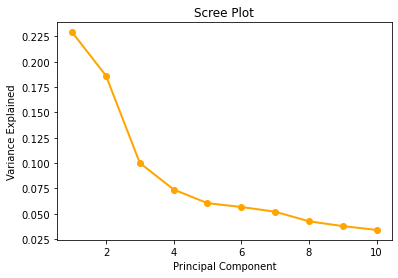

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='orange')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

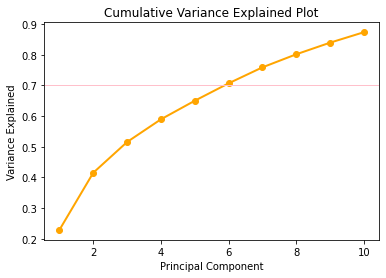

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_), 'o-', linewidth=2, color='orange')
plt.title('Cumulative Variance Explained Plot')
plt.axhline(y=0.70, color='pink', linestyle='-',linewidth=1)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
#right PCA with 6 components

pca = PCA(n_components=6)
pca.fit(CID_data_copy)

PCA(n_components=6)

In [ ]:
scores_pca=pca.transform(CID_data_copy)

In [ ]:
scores_pca

array([[-0.52010493, -0.61624157,  0.3372304 ,  1.4651807 , -1.29540777,
         0.90775974],
       [ 2.61207723, 10.23230585, -1.58329481, -4.25639484, -1.00222639,
        -1.00778043],
       [-0.51735601, -0.48516093,  0.26497767,  1.77877441, -1.30520931,
         0.99344444],
       ...,
       [-0.55771233, -0.09290355, -1.07445714,  0.83300786,  1.07803673,
        -0.40494813],
       [-0.41120661, -0.49090414,  0.48642161,  1.3023079 ,  1.09650349,
        -0.11150375],
       [-0.15402904, -0.16983918,  1.09568091, -0.57743817,  1.14673321,
        -0.70345905]])

In [ ]:
scores_pca.shape

(838768, 6)

Now that we have the resultrs of the Principal Component Analysis, we store them in a dataframe and then in a csv file that we will use for the clustering.

In [ ]:
PCA_components = pd.DataFrame(data = scores_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])

In [ ]:
PCA_components

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.520105,-0.616242,0.337230,1.465181,-1.295408,0.907760
1,2.612077,10.232306,-1.583295,-4.256395,-1.002226,-1.007780
2,-0.517356,-0.485161,0.264978,1.778774,-1.305209,0.993444
3,1.190880,-0.278759,1.237801,-1.409034,-0.717381,1.539300
4,-0.412160,0.278014,-0.896726,0.496923,1.110459,-0.535663
...,...,...,...,...,...,...
838763,-0.276264,1.355331,-3.579852,-1.812119,1.380886,-0.553672
838764,-0.674121,0.716463,-4.220997,0.017966,1.334630,0.048350
838765,-0.557712,-0.092904,-1.074457,0.833008,1.078037,-0.404948
838766,-0.411207,-0.490904,0.486422,1.302308,1.096503,-0.111504


In [ ]:
PCA_components.to_csv('PCA_components.csv')

### 2.3 Clustering!

In [8]:
import sys
import os
import json
from pyspark import SparkContext
from pyspark.sql import SparkSession
import time

In [3]:
! sudo apt-get update

Hit:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:13 http://archive.ubuntu.co

In [4]:
! sudo mkdir -p /usr/share/man/man1

In [5]:
! sudo apt-get install -y openjdk-11-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  openjdk-11-demo openjdk-11-source visualvm
The following NEW packages will be installed:
  openjdk-11-jdk
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 13.6 kB of archives.
After this operation, 56.3 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openjdk-11-jdk amd64 11.0.17+8-1ubuntu2~18.04 [13.6 kB]
Fetched 13.6 kB in 0s (75.7 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf:

In [6]:
! pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 50 kB/s 
     |████████████████████████████████| 199 kB 60.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=44f35b5a49ec5ba807588b6f14e79821269fa5ecb7206e8ed58541a45b416091
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [9]:
spark = SparkSession.builder.appName('clustering').getOrCreate()
spark

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = spark.read.csv("/content/drive/MyDrive/ADM_HW4/PCA_components.csv", header=True, inferSchema=True)

In [12]:
data

DataFrame[_c0: int, pc1: double, pc2: double, pc3: double, pc4: double, pc5: double, pc6: double]

In [13]:
data = data.drop('_c0')

In [14]:
data.show(10)

+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+
|                 pc1|                 pc2|                pc3|                 pc4|                pc5|                 pc6|
+--------------------+--------------------+-------------------+--------------------+-------------------+--------------------+
| -0.5201049272967656|  -0.616241567747282|0.33723040303585794|  1.4651807071780805|-1.2954077844998024|  0.9077596994851468|
|   2.612077232101859|  10.232305852432924|-1.5832948071052153|  -4.256394843107796|-1.0022263515668417| -1.0077804069446663|
| -0.5173560111230056|-0.48516092529031507| 0.2649776674304945|  1.7787744164871162|-1.3052093215527456|  0.9934443912427067|
|  1.1908799740364018| -0.2787586138289239| 1.2378009303461825| -1.4090336481703383|-0.7173806778423387|  1.5393003382560229|
| -0.4121600578035001| 0.27801426704461485|-0.8967262634584299|  0.4969232451203754| 1.1104590152478793| -0.5356625268

1 - Implementation of the K-means clustering algorithm using MapReduce.

In [15]:
def assign_cluster(x, centroids):
    d = []  #list of the distances
    for i in centroids:
        dist = np.linalg.norm(np.array(x) - np.array(i))
        d.append(dist)
    return (np.argmin(d), np.array(x))

In [16]:
def new_centroid(old_centroids):
    out = sum(old_centroids) / len(old_centroids)
    return out

In [17]:
def square_loss(y, centroid):
    loss = np.linalg.norm(np.array(y[1])-np.array(centroid[y[0]]))
    sqloss = np.square(loss)
    return sqloss

In [19]:
def clustering(X, k):

    #INITIALIZATION
    threshold = 0.1
    diff = [100000000, 10000000]
    i=0

    #START: random centroids
    centroids = X.rdd.takeSample(False, k)

    #ITERATION (if stopping condition satisfied)
    while diff[i]-diff[i+1] > threshold and i<100: # 100 = maximum iterations number

      cl = X.rdd.map(lambda x: assign_cluster(x, centroids)).collect()

      cl_rdd = spark.sparkContext.parallelize(cl)

      centroids = cl_rdd.groupByKey().mapValues(lambda x: new_centroid(x)).map(lambda a: a[1]).collect()

      loss = cl_rdd.map(lambda x: (x[0], square_loss(x, centroids))).groupByKey().mapValues(sum).values().collect()

      diff.append(np.sum(loss))

      i+=1

    return cl_rdd.keys().collect()

In [20]:
#clust = clustering(data, 2)

2 - Find an optimal number of clusters using at least 2 different methods. 

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/ADM_HW4/PCA_components.csv")

In [ ]:
data2 = data2.drop('Unnamed: 0', axis=1)

In [ ]:
data2.head(10)

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.520105,-0.616242,0.337230,1.465181,-1.295408,0.907760
1,2.612077,10.232306,-1.583295,-4.256395,-1.002226,-1.007780
2,-0.517356,-0.485161,0.264978,1.778774,-1.305209,0.993444
3,1.190880,-0.278759,1.237801,-1.409034,-0.717381,1.539300
4,-0.412160,0.278014,-0.896726,0.496923,1.110459,-0.535663
5,0.079406,-0.216282,1.333457,-1.715301,-1.209716,-0.091477
6,-0.555571,0.117976,-2.052400,-1.323839,-1.936639,6.166395
7,-0.027244,-0.519643,0.873049,-0.446656,-1.237053,0.284574
8,-0.336544,-0.305064,0.689776,0.789068,1.135401,-0.281128
9,-0.449357,-0.440173,0.085414,0.283147,1.031864,-0.844194


In [ ]:
model = KMeans()

The Elbow method.

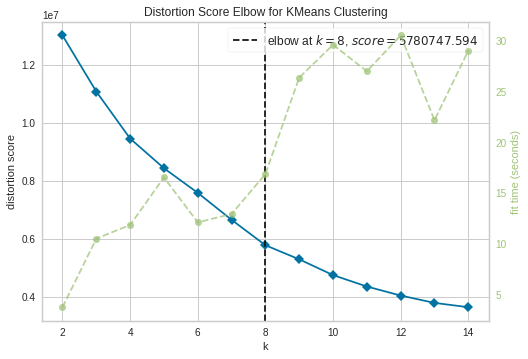

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(data2)
visualizer.show()

The silhouette method.

In [ ]:
visualizer = KElbowVisualizer(model, k=(2,15),metric='silhouette', timings= True)
visualizer.fit(data2)
visualizer.show()

KeyboardInterrupt: ignored

We decided tyo consider as the best number of clusters 24 because the Elbow method is the most famous, using the distorsion score (sum of squared error) as a measure.

In [22]:
clust = clustering(data, 24)

salva qui il risultato per lavorarci in locale poi

In [23]:
with open("/content/drive/MyDrive/ADM_HW4/clust_output.pkl", "wb") as file:
    pkl.dump(clust, file)

In [ ]:
with open("clust_output.pkl", "rb") as file:
    clust_output = pkl.load(file)

### 2.4 Analysing your results!

## Bonus

Think about any two other clustering algorithms that you would like to use for the dataset (of course, you can use implemented version of them, e.g. from the scikit-learn library). Compare the results of chosen two algorithms with K-means implemented by you and K-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results. Which one is the best, in your opinion, and why?

## Algorithmic Question

In [ ]:
entry,n_studs,n_guards= list(map(int,input().split()))

students  = list(map(int,input().split()))

guards = 1
for i in range(1,n_studs) :
    if(students[i] != students[i-1] and students[i] not in students[:i]):
        if(students[i-1] in students[i:]):
            guards += 1

print( 'Yes' if guards <= n_guards else 'No')